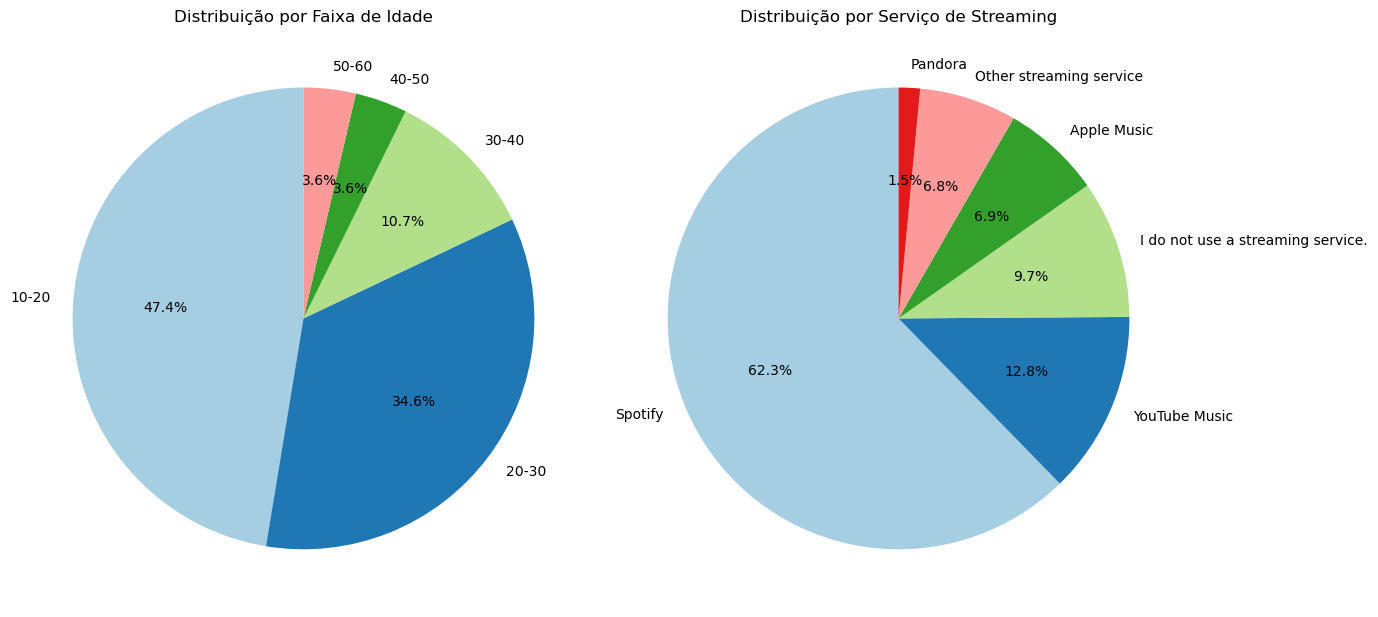

In [4]:
# Representatividade na pesquisa por Idade e por Streaming

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tab_musicaesaude.xlsx'

df = pd.read_excel(file_path, sheet_name='musicaesaude')

faixas_idade = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60], 
                      labels=['10-20', '20-30', '30-40', '40-50', '50-60'])

faixa_idade_counts = faixas_idade.value_counts()

streaming_counts = df['Primary streaming service'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].pie(faixa_idade_counts, labels=faixa_idade_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Distribuição por Faixa de Idade')

axs[1].pie(streaming_counts, labels=streaming_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Distribuição por Serviço de Streaming')

plt.tight_layout()
plt.show()


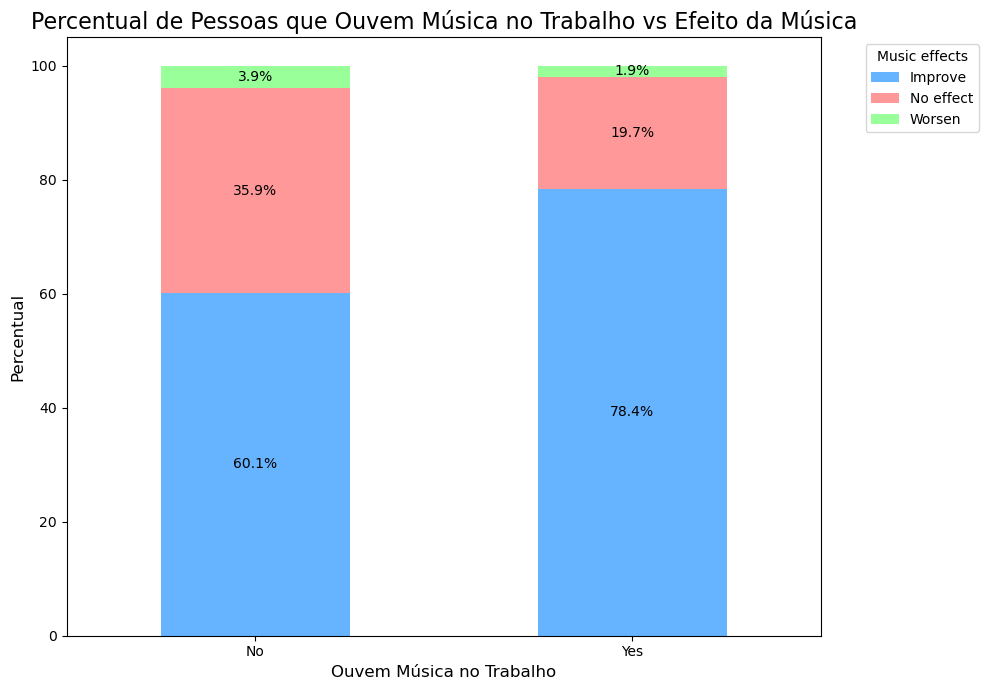

In [4]:
# Efeito Positivo da Música em Pessoas que Ouvem Música no Trabalho

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tab_musicaesaude.xlsx'
df = pd.read_excel(file_path, sheet_name='musicaesaude')

while_working_effects = df.groupby(['While working', 'Music effects']).size().unstack(fill_value=0)

while_working_percent = while_working_effects.div(while_working_effects.sum(axis=1), axis=0) * 100

ax = while_working_percent.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#66b3ff', '#ff9999', '#99ff99', '#ffcc99'])

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0: 
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Percentual de Pessoas que Ouvem Música no Trabalho vs Efeito da Música', fontsize=16)
plt.xlabel('Ouvem Música no Trabalho', fontsize=12)
plt.ylabel('Percentual', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Music effects', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()



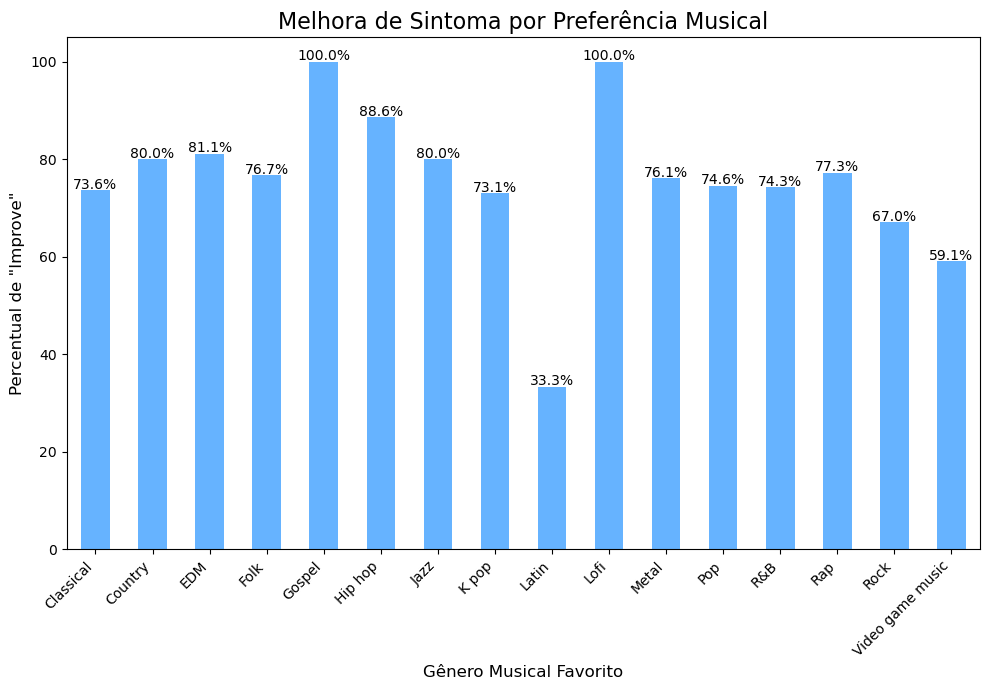

In [48]:
# Melhora de Sintoma por Gênero Musical Favorito

import pandas as pd
import matplotlib.pyplot as plt

file_path = 'tab_musicaesaude.xlsx'
df = pd.read_excel(file_path, sheet_name='musicaesaude')

improve_data = df[df['Music effects'] == 'Improve']

genre_improve_counts = improve_data['Fav genre'].value_counts()

genre_total_counts = df['Fav genre'].value_counts()
genre_improve_percent = (genre_improve_counts / genre_total_counts) * 100

ax = genre_improve_percent.plot(kind='bar', figsize=(10, 7), color='#66b3ff')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center_baseline', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('Melhora de Sintoma por Preferência Musical', fontsize=16)
plt.xlabel('Gênero Musical Favorito', fontsize=12)
plt.ylabel('Percentual de "Improve"', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


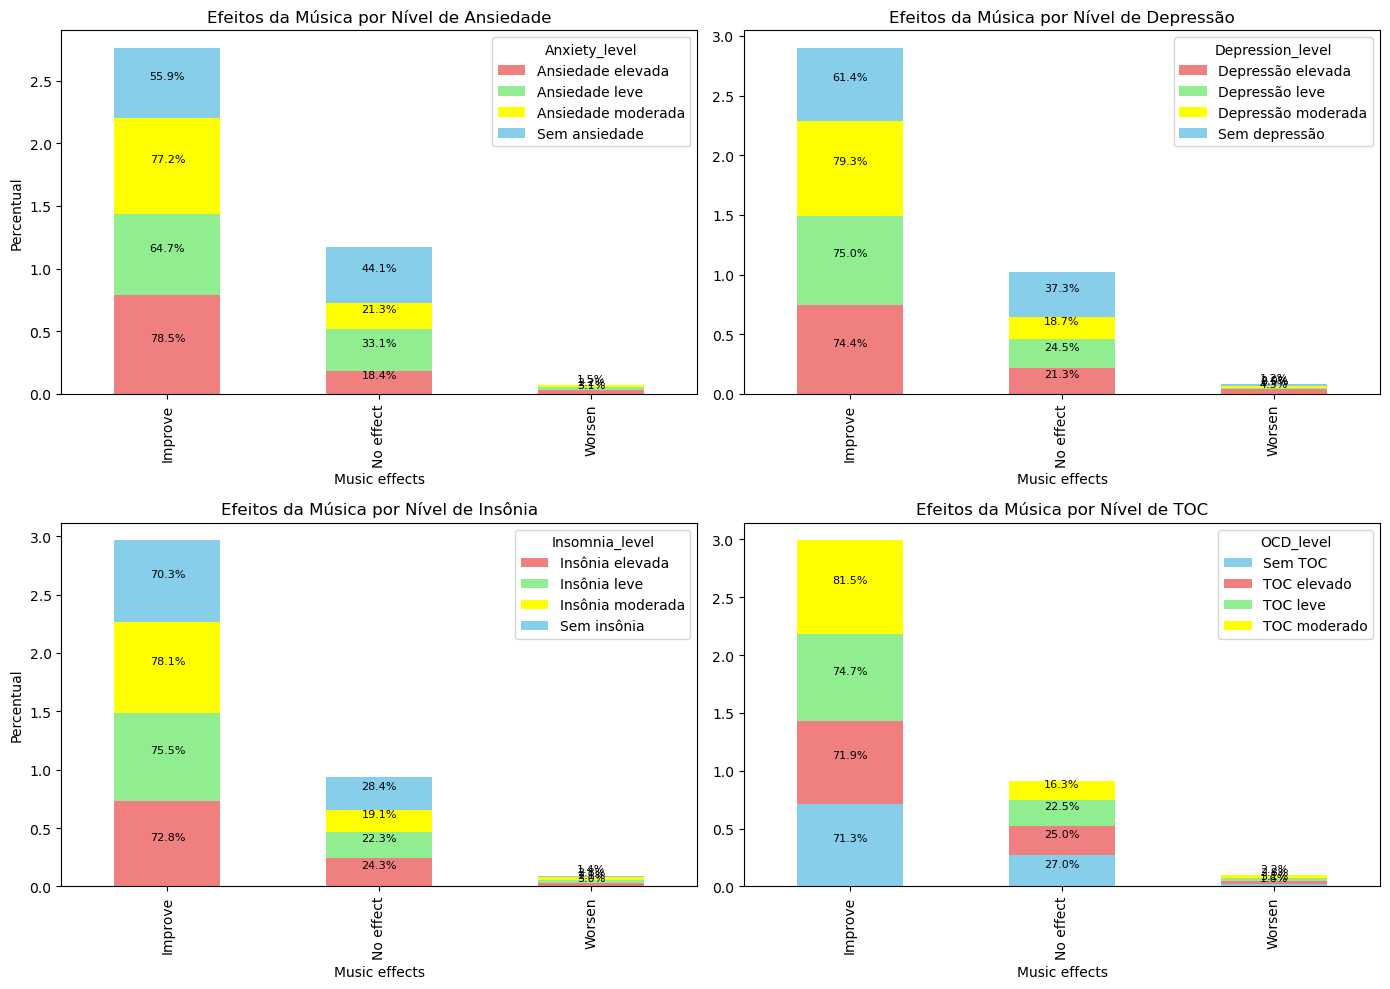

In [32]:
# Efeito da Música por Nível de Transtorno

import pandas as pd
import matplotlib.pyplot as plt
 
file_path = 'tab_musicaesaude.xlsx'
df = pd.read_excel(file_path, sheet_name='musicaesaude')
 
anxiety_counts = df['Anxiety_level'].value_counts()
depression_counts = df['Depression_level'].value_counts()
insomnia_counts = df['Insomnia_level'].value_counts()
ocd_counts = df['OCD_level'].value_counts()
 
music_effects = df['Music effects'].value_counts()
 
anxiety_effects = df.groupby('Anxiety_level')['Music effects'].value_counts(normalize=True).unstack(fill_value=0)
depression_effects = df.groupby('Depression_level')['Music effects'].value_counts(normalize=True).unstack(fill_value=0)
insomnia_effects = df.groupby('Insomnia_level')['Music effects'].value_counts(normalize=True).unstack(fill_value=0)
ocd_effects = df.groupby('OCD_level')['Music effects'].value_counts(normalize=True).unstack(fill_value=0)
 
def add_value_labels(ax, spacing=5):
    """Adiciona rótulos de valor em cada barra de um gráfico"""
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:  # Somente rotular barras com valor positivo
            ax.annotate(f'{height*100:.1f}%',
                        (patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2),
                        ha='center', va='center', xytext=(0, spacing),
                        textcoords='offset points', fontsize=8, color='black')
 
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
 
anxiety_effects.T.plot(kind='bar', stacked=True, ax=axs[0, 0], color=['lightcoral', 'lightgreen','yellow','skyblue'])
axs[0, 0].set_title('Efeitos da Música por Nível de Ansiedade')
axs[0, 0].set_ylabel('Percentual')
add_value_labels(axs[0, 0])
 
depression_effects.T.plot(kind='bar', stacked=True, ax=axs[0, 1], color=['lightcoral', 'lightgreen','yellow','skyblue'])
axs[0, 1].set_title('Efeitos da Música por Nível de Depressão')
add_value_labels(axs[0, 1])
 
insomnia_effects.T.plot(kind='bar', stacked=True, ax=axs[1, 0], color=['lightcoral', 'lightgreen','yellow','skyblue'])
axs[1, 0].set_title('Efeitos da Música por Nível de Insônia')
axs[1, 0].set_ylabel('Percentual')
add_value_labels(axs[1, 0])
 
ocd_effects.T.plot(kind='bar', stacked=True, ax=axs[1, 1], color=['skyblue', 'lightcoral', 'lightgreen','yellow'])
axs[1, 1].set_title('Efeitos da Música por Nível de TOC')
add_value_labels(axs[1, 1])
 
plt.tight_layout()
plt.show()

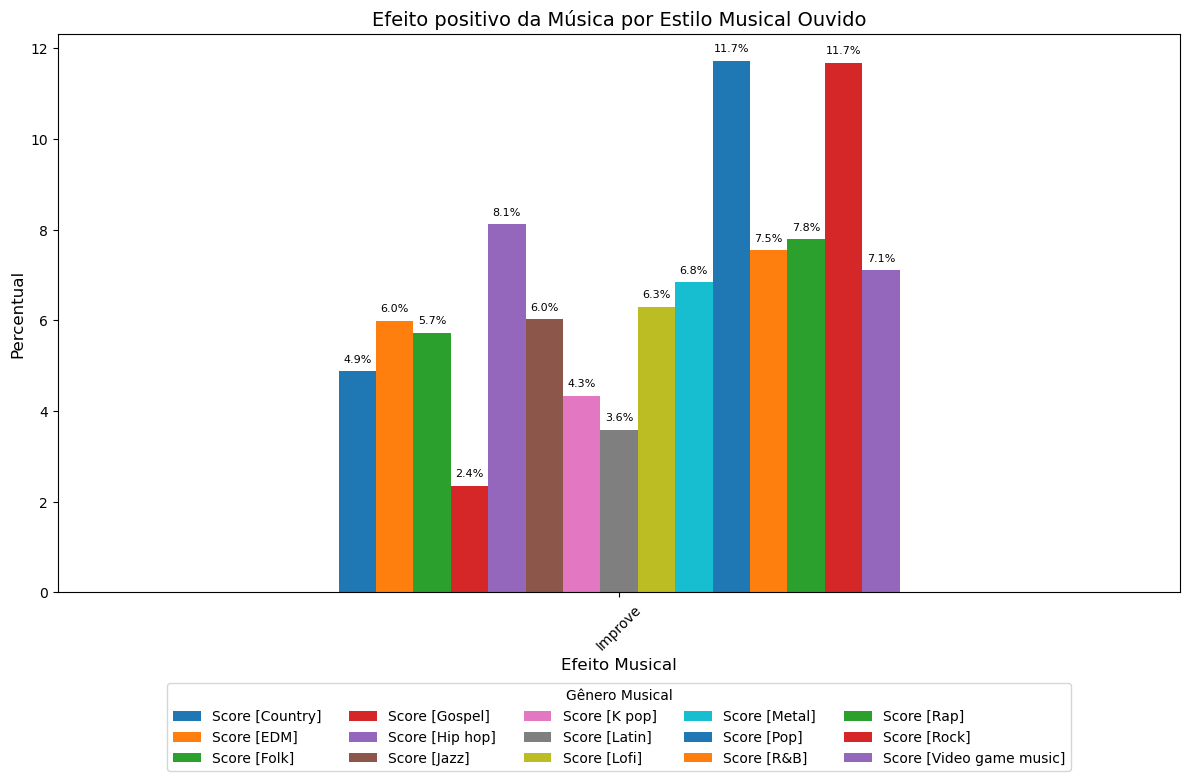

In [49]:
# Melhora de Sintoma por Frequência de Consumo Musical

import pandas as pd
import matplotlib.pyplot as plt
 
file_path = 'tab_musicaesaude.xlsx'
df = pd.read_excel(file_path, sheet_name='musicaesaude')
 
df_improve = df[df['Music effects'] == 'Improve']
 
score_columns = [
    'Score [Country]', 'Score [EDM]', 'Score [Folk]', 'Score [Gospel]', 'Score [Hip hop]',
    'Score [Jazz]', 'Score [K pop]', 'Score [Latin]', 'Score [Lofi]', 'Score [Metal]', 
    'Score [Pop]', 'Score [R&B]', 'Score [Rap]', 'Score [Rock]', 'Score [Video game music]'
]
 
effects_by_genre = df_improve.groupby('Music effects')[score_columns].sum()
 
total_scores = effects_by_genre.sum(axis=1)
 
effects_percent = (effects_by_genre.T / total_scores).T * 100
 
def add_value_labels(ax, spacing=5):
    """Adiciona rótulos de valor em cada barra de um gráfico"""
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (patch.get_x() + patch.get_width() / 2, height),
                        ha='center', va='bottom', xytext=(0, spacing),
                        textcoords='offset points', fontsize=8, color='black')
 
fig, ax = plt.subplots(figsize=(12, 8))
 
effects_percent.plot(kind='bar', ax=ax)
 
ax.set_title('Efeito positivo da Música por Estilo Musical Ouvido', fontsize=14)
ax.set_xlabel('Efeito Musical', fontsize=12)
ax.set_ylabel('Percentual', fontsize=12)
 
add_value_labels(ax)
 
ax.legend(title='Gênero Musical', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Tabela de Comparação Entre Gênero Favorito e Frequência de Consumo Musical

columns_of_interest = [
    'Fav genre', 'Score [Country]', 'Score [EDM]', 'Score [Folk]', 'Score [Gospel]', 
    'Score [Hip hop]', 'Score [Jazz]', 'Score [K pop]', 'Score [Latin]', 
    'Score [Lofi]', 'Score [Metal]', 'Score [Pop]', 'Score [R&B]', 
    'Score [Rap]', 'Score [Rock]', 'Score [Video game music]'
]

df_selected = df[columns_of_interest]

grouped_scores = df_selected.groupby('Fav genre').mean()

percentage_scores = grouped_scores.apply(lambda x: 100 * x / x.sum(), axis=1)

inverted_percentage_scores = percentage_scores.transpose()

inverted_percentage_scores = inverted_percentage_scores.round(1)

inverted_percentage_scores['Total'] = inverted_percentage_scores.sum(axis=1)

inverted_percentage_scores_sorted = inverted_percentage_scores.sort_values(by='Total', ascending=False)

inverted_percentage_scores_sorted = inverted_percentage_scores_sorted.drop(columns=['Total'])

print("Frequência de Consumo vs Preferência Musical\n")

inverted_percentage_scores_sorted.head(20)


Frequência de Consumo vs Preferência Musical



Fav genre,Classical,Country,EDM,Folk,Gospel,Hip hop,Jazz,K pop,Latin,Lofi,Metal,Pop,R&B,Rap,Rock,Video game music
Score [Pop],14.4,11.0,10.2,9.5,10.1,11.0,9.1,12.6,10.9,9.8,9.1,15.9,11.6,10.7,11.8,10.0
Score [Rock],10.6,12.6,9.8,11.6,7.2,8.0,10.3,8.1,7.8,8.1,16.3,9.8,6.3,7.3,17.1,9.1
Score [Hip hop],6.6,7.8,8.9,6.9,4.3,14.8,6.0,9.3,10.9,7.7,6.3,8.8,11.4,14.1,6.3,6.0
Score [Rap],4.0,6.5,9.5,6.0,4.3,13.7,5.8,7.9,10.9,6.8,7.1,8.4,10.9,16.5,6.3,5.1
Score [R&B],5.1,4.8,6.7,5.6,10.1,10.4,7.7,10.3,6.2,6.0,4.7,8.8,14.6,8.6,6.3,4.7
Score [Video game music],8.9,3.0,8.0,7.6,2.9,3.4,6.5,4.7,6.2,8.5,9.1,6.1,4.4,7.3,6.9,16.8
Score [Lofi],6.3,2.7,6.7,6.5,4.3,7.1,7.7,7.9,6.2,12.8,4.4,6.0,6.1,8.1,5.4,9.1
Score [Jazz],10.8,3.5,4.1,6.2,5.8,5.6,13.5,6.1,1.6,7.2,4.2,5.4,5.5,6.0,5.7,7.2
Score [EDM],5.1,4.3,16.2,4.4,1.4,6.0,6.0,5.1,4.7,6.0,5.6,6.0,3.9,4.5,4.9,7.6
Score [Folk],5.3,8.3,3.9,14.9,7.2,3.6,4.8,3.0,1.6,5.5,5.5,4.5,3.2,3.1,7.9,4.9
